In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data = pd.read_csv('ResumeDataSet.csv' ,encoding='utf-8')
data['cleaned'] = ''
data.head()

,Category,Resume,cleaned
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
 2   cleaned   962 non-null    object
dtypes: object(3)
memory usage: 22.7+ KB


In [4]:
print(data['Category'].unique())

['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


In [5]:
print (data['Category'].value_counts())

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Data Science                 40
Blockchain                   40
Sales                        40
Mechanical Engineer          40
ETL Developer                40
Operations Manager           40
Arts                         36
Database                     33
PMO                          30
Electrical Engineering       30
Health and fitness           30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64


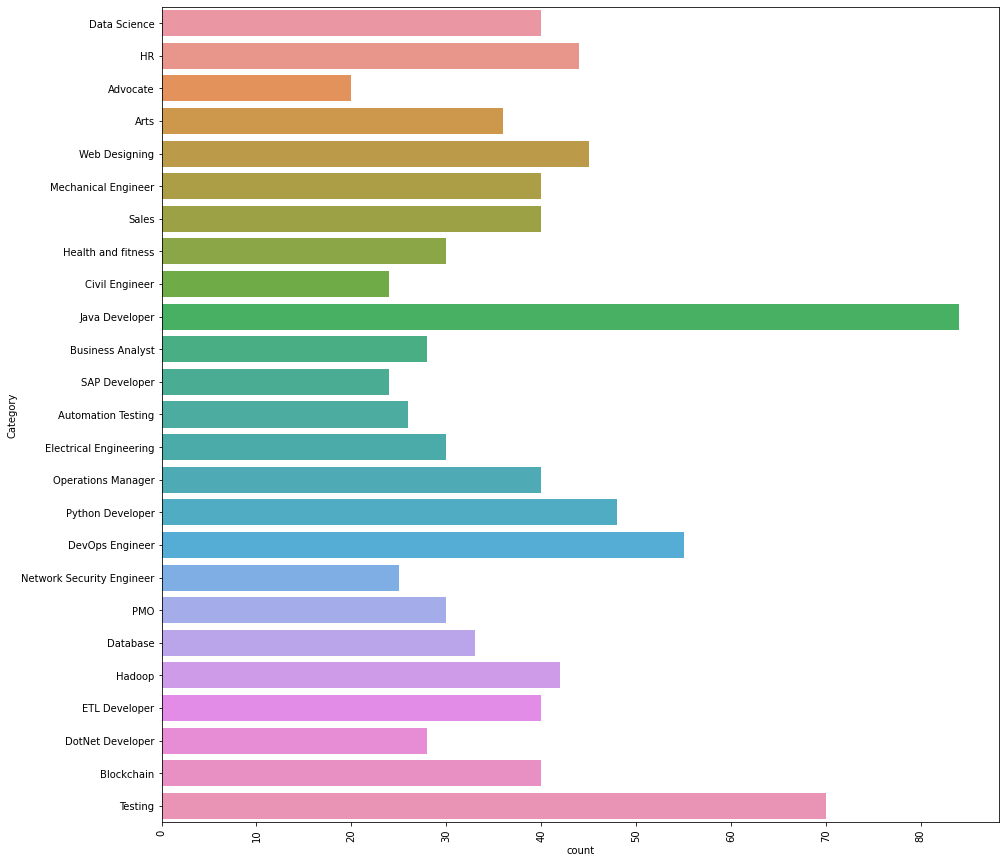

In [6]:
import seaborn as sns
plt.figure(figsize=(15,15))
plt.xticks(rotation = 90)
sns.countplot(y="Category", data=data)

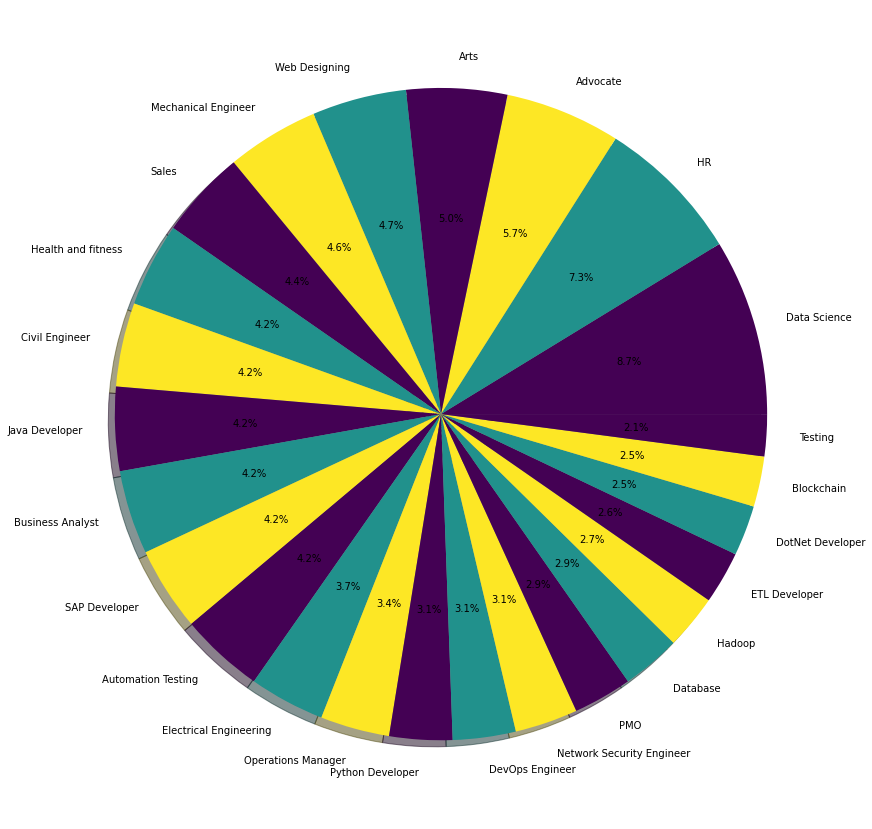

In [20]:
targetCounts = data['Category'].value_counts()
targetLabels  = data['Category'].unique()
plt.figure(1, figsize=(15,15))
cmap = plt.get_cmap()
colors = [cmap(i) for i in np.linspace(0, 1, 3)]
source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

In [8]:
import re
def cleanResume(data):
    data = re.sub('http\S+\s*', ' ', data)  
    data = re.sub('RT|cc', ' ', data)  
    data = re.sub('#\S+', '', data)  
    data = re.sub('@\S+', '  ', data)  
    data = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', data)  # remove punctuations
    data = re.sub(r'[^\x00-\x7f]',r' ', data) 
    data = re.sub('\s+', ' ', data)  
    return data
data['cleaned'] = data.Resume.apply(lambda x: cleanResume(x)) 

In [9]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

In [10]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
oneSetOfStopWords = set(stopwords.words('english'))
totalWords= []
Sentences = data['Resume'].values
CleanedSentences = " "

In [12]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
data.head()

,Category,Resume,cleaned
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [14]:
for i in range(0,160):
  cleanedtext = cleanResume(Sentences[i])
  CleanedSentences += cleanedtext
  Words = nltk.word_tokenize(cleanedtext)
  for word in Words:
    if word not in oneSetOfStopWords and word not in string.punctuation:
      totalWords.append(word)


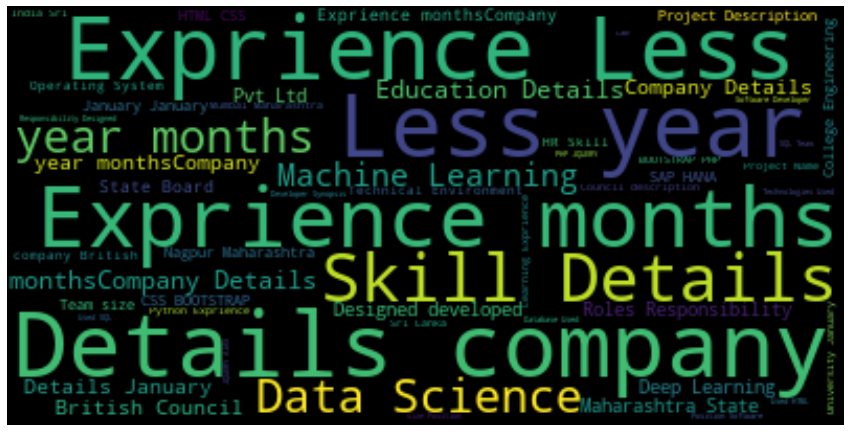

In [15]:
wc = WordCloud().generate(CleanedSentences)
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

In [17]:
requiredText = data['cleaned'].values
requiredTarget = data['Category'].values

In [18]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)
X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=0, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(769, 1500)
(193, 1500)


In [19]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))
print(metrics.classification_report(y_test, prediction))

0.9934980494148244
0.9896373056994818
                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         3
                     Arts       1.00      1.00      1.00         3
       Automation Testing       1.00      0.80      0.89         5
               Blockchain       1.00      1.00      1.00         9
         Business Analyst       1.00      1.00      1.00         6
           Civil Engineer       0.83      1.00      0.91         5
             Data Science       1.00      1.00      1.00         9
                 Database       1.00      1.00      1.00         7
          DevOps Engineer       1.00      0.91      0.95        11
         DotNet Developer       1.00      1.00      1.00         9
            ETL Developer       1.00      1.00      1.00         8
   Electrical Engineering       0.90      1.00      0.95         9
                       HR       1.00      1.00      1.00         5
                   Hado